In [1]:
from sympy import symbols, Derivative, apart, solve, Eq, sqrt
from sympy import *
from math import e

# [On true compound interest and the law of organic growth](http://calculusmadeeasy.org/14.html)

This is explained very clearly in [Better Explained](https://betterexplained.com/) by Kalid Azad:  [here](https://betterexplained.com/articles/an-intuitive-guide-to-exponential-functions-e/) and [here](https://betterexplained.com/articles/think-with-exponents/).

In [2]:
n = symbols('n')

In [3]:
expr = (1 + 1/n)**n
expr

(1 + 1/n)**n

Now we will evaluate the function above for different (increasing) values of `n`:

In [4]:
for i in [0, 10, 100, 1000, 10000, 100000, 1000000]:
    print(expr.evalf(subs={n: i}))

1.00000000000000
2.59374246010000
2.70481382942153
2.71692393223589
2.71814592682522
2.71826823717449
2.71828046931938


We will avail ourselves of the binomial
theorem, and expand the expression $\left(1 + \dfrac{1}{n}\right)^n$ in that
well-known way.

The binomial theoremgives the rule that:  

$ (a + b)^n = a^n + n\dfrac{a^{n-1}b}{1!} + n(n - 1) \dfrac{a^{n-2} b^2}{2!}
   + n(n -1)(n - 2) \dfrac{a^{n-3} b^3}{3!}\dots$ etc


If $a = 1$ , $b = 1/n$ and $n$ becomes inifintely large (so we can asume $n-1 , n-2, n-3$ will all be sensibly equal to $n$, the series becomes:

$\epsilon = 1 + 1 + \dfrac{1}{2!} + \dfrac{1}{3!} + \dfrac{1}{4!} + \dfrac{1}{5!} + \dots$ etc

## Exponential Series

If we expand the expression to $\left(1 + \dfrac{1}{n}\right)^{nx}$ as $n$ becomes infinitely great, the simplification becomes:

$\epsilon^x = 1 + x + \dfrac{x^2}{2!} + \dfrac{x^3}{3!} + \dfrac{x^4}{4!} + \dfrac{x^5}{5!} + \dots$ etc.  

This is called *the exponential series*.

If we differentiate it:  
$\epsilon^x = 1 + x + \dfrac{x^2}{1 \cdot 2} + \dfrac{x^3}{1 \cdot 2 \cdot 3} + \dfrac{x^4}{1 \cdot 2 \cdot 3 \cdot 4} + \dots$ etc, which is the same as the original series.

from mpmath import *
mp.dps = 50; mp.pretty = True
+e

## The Logarithmic Curve

Lets consider the equation $bp^x$, we can see that for different values of $x$:  
$x=1, y=bp$; $x=2, y=bp^2$; $x=3, y=bp^3$; and so on... In this case, $p$ is the numerical value of the ratio between the hight of any ordinate (value of $x$) and the height of the next value of $x$. So if $p=\dfrac{6}{5}$, each ordinate (value of $x$) will be $\dfrac{6}{5}$ as high as the one before.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [6]:
x, y, p, b, n = symbols('x y p b n', isreal=True)

In [7]:
expr = b*p**x
expr

b*p**x

In [8]:
# make a list with the vales of x / ordinates
x_values = np.linspace(1, 10, 10)

# make a list with the corresponding values of y (evaluate the function substituting x)
# p --> 6/5  = ratio of change in height
# b --> 2  = initial height
y_values = [expr.evalf(subs={p: 6/5, b: 2, x: i}) for i in np.linspace(1, 10, 10)]   

<BarContainer object of 10 artists>

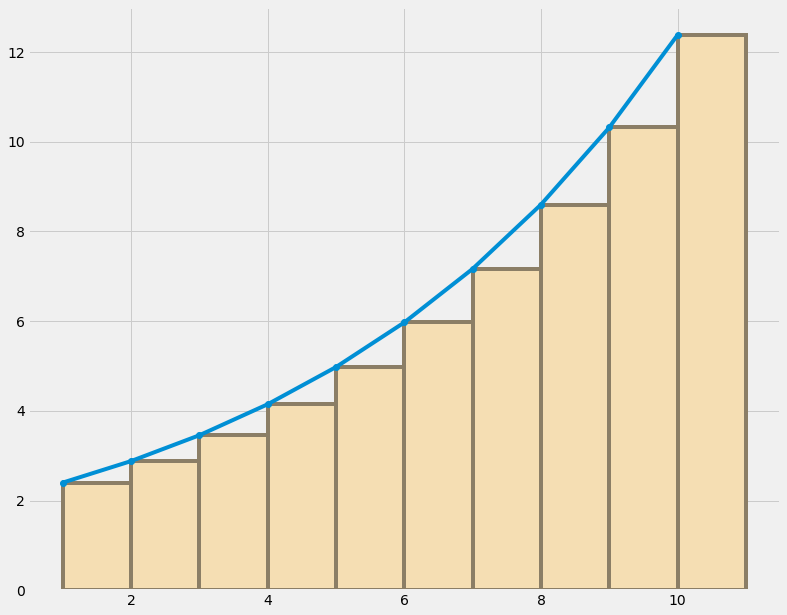

In [9]:
plt.style.use('fivethirtyeight')

# we will use ax1 instead of the usual ax so as to not interfere with sympy symbols
fig, ax = plt.subplots(figsize=(12, 10))

ax.plot(x_values, y_values, label='Line', marker='o')
ax.bar(x_values, y_values, 1, color='wheat', edgecolor='#8B7E66', linewidth=4.0, align='edge')

If two successive vales of $x$ are related together in a constant ratio (liek in our example), thei logarithms will have a constant difference, so that, if we plot our new curve making the values of $y = log_{\epsilon}y$, the new graph will be a straight line.

<BarContainer object of 10 artists>

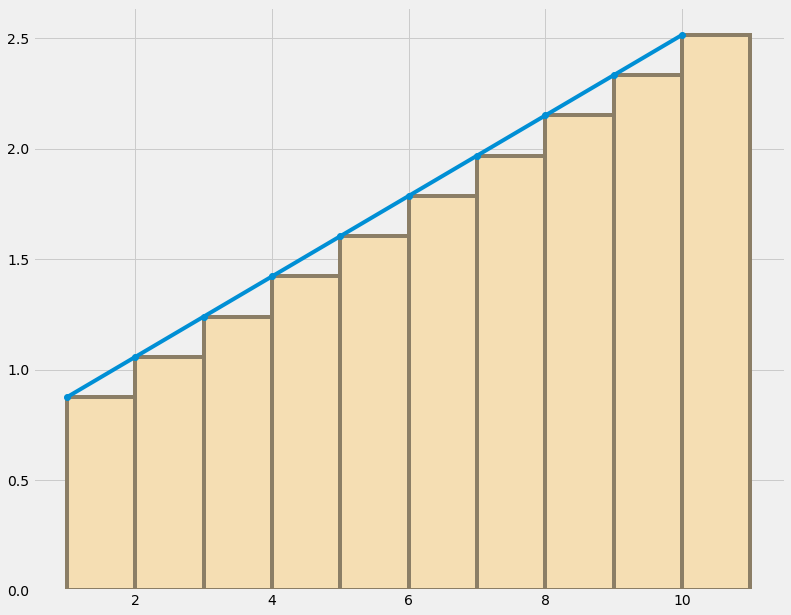

In [10]:
y_values_log = np.log(np.array(y_values, dtype=np.float))

fig, ax = plt.subplots(figsize=(12, 10))

ax.plot(x_values, y_values_log, label='Line', marker='o')
ax.bar(x_values, y_values_log, 1, color='wheat', edgecolor='#8B7E66', linewidth=4.0, align='edge')

In fact, if we take the $log$ of the original equation ($y=bp^x$):

$log_{\epsilon}y = log_{\epsilon}b + x \cdot log_{\epsilon}p$  
  
$log_{\epsilon}y - log_{\epsilon}b = x \cdot log_{\epsilon}p$  
  
Now, since $log_{\epsilon}p$ is just a number, we can write it as $log_{\epsilon}p = a$, and ou last equation becomes:

$log_{\epsilon}\dfrac{y}{b} = ax$  
  
$y = b\epsilon^{ax}$


## [The Die-away Curve](http://calculusmadeeasy.org/14b.html)

For the equation above, if $p$ was a proper fraction ($p<1$), the equation of the curve would be:  
  
  $y=b\epsilon^{-ax}$  
   
That equation represents many physical processes in which something is *gradaully dying away*. For example the cooling of a hot body (Newton's law of cooling): $\theta_t = \theta_o\epsilon^{-at}$; $\epsilon^{-at}$ serves as a *die-away factor*.

In [11]:
a = symbols('a')

In [12]:
expr = b * exp(-a*x)
expr

b*exp(-a*x)

In [13]:
diff(expr, x)

-a*b*exp(-a*x)

$-ab\epsilon^{-ax} = -ay$

*The Time-constant.* In the expression for the “die-away factor” $\epsilon^{−at}$, the quantity a is the reciprocal of another quantity known as *“the time-constant,”* which we may denote by the symbol $T$. Then the die-away factor will be written $\epsilon^{-\frac{t}{T}}$; and it will be seen, by making $t = T$ that the meaning of $T$ $(\text{or of} \dfrac{1}{a})$ is that this is the length of time which it takes a for the original quantity (called $\theta_0$ or $Q_0$ in the preceding instances) to die away $\dfrac{1}{\epsilon}$th part, that is to $0.3678$, of its original value.

### Example

The damping on a telephone line can be ascertained from the relation $i = i_0\epsilon^{−\beta l}$ , where $i$ is the strength, after $t$ seconds, of a telephonic current of initial strength $i_0$ ; $l$ is the length of the line in kilometres, and $\beta$ is a constant. For the Franco-English submarine cable laid in 1910, $\beta = 0.0114$. Find the damping at the end of the cable (40 kilometres), and the length along which $i$ is still $8%$ of the original current (limiting value of very good audition).

In [14]:
# i will represent i_0
i, b, l = symbols('i b l', isreal=True)

In [15]:
expr = i*exp(-b*l)
expr

i*exp(-b*l)

Damping at the end of the cable:

In [16]:
expr.subs({l: 40, b: 0.0114})

0.633813837098549*i

So at the end of the cable the damping will be $0.6338$ ($63.4%$) of $i_0$

Now for the second part of the exercise, we are looking for the length where $i = 0.08i_0$. So we can represent the equation as:  

$8 = 100 \cdot \epsilon^{-\beta l}$  

$0.08 = \epsilon^{-\beta l}$

$\ln{0.08} = -\beta l$

$l = \frac{\ln0.08}{-\beta}$

In [27]:
tosolve = log(0.08) / -b

In [29]:
tosolve.subs({b: 0.0114})

221.555144237566

The length at which $i = 0.08i_0$ is 221.5km

(Exercise) Finde the maxima of the next function:

In [18]:
from sympy import ln

In [19]:
expr = x**3 - ln(x)
expr

x**3 - log(x)

In [20]:
diff(expr, x)

3*x**2 - 1/x

In [21]:
[sol.evalf() for sol in solve(diff(expr))]

[0.693361274350635,
 -0.346680637175317 - 0.600468477588001*I,
 -0.346680637175317 + 0.600468477588001*I]